In [1]:
import numpy as np
import scipy.stats
import scipy.integrate as integrate
import quadrature_scikit as qs
import matplotlib.pyplot as plt

In [2]:
def flambda(a):
#     return lambda x: x*0.0+2.0
#     return lambda x: scipy.stats.norm(0, 2.0).pdf(x)
    return lambda x: np.cos(a*x)/(1+x**2)+1
# def prior(a):
#     return 0.0, 1.0
def normal(s):
    return scipy.stats.norm(0, 1.0).pdf(s)

In [3]:
integrate.quad(lambda x: flambda(1.0)(x)*normal(x),np.NINF,np.inf)

(1.507873403577914, 4.770777978736957e-09)

In [4]:
d= qs.init(flambda(1.0),(np.array([0.0]),np.array([[1.0]])), 100)

/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.10184097]), 'nit': 7, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-62.75970078]), 'nit': 1, 'funcalls': 48}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00029755]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

In [5]:
print d.mu, d.var

0.17841241443238687 2.9239943799552748e-12


RBF(length_scale=0.62)

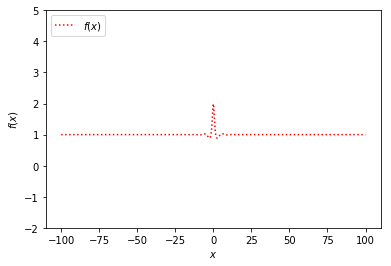

In [38]:
import matplotlib.pyplot as plt
gp = d.gp
f = flambda(1.0)
x = np.atleast_2d(np.linspace(-100, 100, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x)$')
# plt.plot(gp.X_train_, gp.y_train_, 'r.', markersize=10, label=u'Observations')
# plt.plot(x, y_pred, 'b-', label=u'Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-2, 5)
plt.legend(loc='upper left')

In [33]:
actions = np.linspace(-10,10,40)
x = []
y = []
e = []
for a in actions:
    print a
    x.append(a)
    d= qs.init(flambda(a),(np.array([0.0]),np.array([[1.0]])), 40)
    y.append(d.mu)
    e.append(10*d.var)

-10.0
-9.487179487179487
-8.974358974358974


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.48791004e-05]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)


-8.461538461538462


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00275661]), 'nit': 8, 'funcalls': 80}
  " state: %s" % convergence_dict)


-7.948717948717949
-7.435897435897436
-6.923076923076923
-6.410256410256411


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-20.57555435]), 'nit': 1, 'funcalls': 32}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.97853051e-05]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01247451]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

-5.897435897435898


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.62495743e-05]), 'nit': 6, 'funcalls': 69}
  " state: %s" % convergence_dict)


-5.384615384615385


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00055487]), 'nit': 7, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00016086]), 'nit': 12, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0006824]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-4.871794871794872


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00029073]), 'nit': 6, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00850966]), 'nit': 8, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.88349784e-05]), 'nit': 9, 'funcalls': 85}
  " state: %s" % convergence_dict)


-4.3589743589743595


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00060142]), 'nit': 7, 'funcalls': 83}
  " state: %s" % convergence_dict)


-3.8461538461538467


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00037599]), 'nit': 7, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.75464666e-05]), 'nit': 7, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-27.93982916]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

-3.333333333333334


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00513881]), 'nit': 5, 'funcalls': 70}
  " state: %s" % convergence_dict)


-2.820512820512821


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0192244]), 'nit': 6, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00155043]), 'nit': 6, 'funcalls': 78}
  " state: %s" % convergence_dict)


-2.3076923076923084


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00053991]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00047441]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)


-1.7948717948717956


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00014503]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-15.36326814]), 'nit': 2, 'funcalls': 37}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08166009]), 'nit': 5, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-1.2820512820512828


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00020526]), 'nit': 4, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010544]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05162626]), 'nit': 7, 'funcalls': 79}
  " state: %s" % convergence_dict)


-0.76923076923077


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00465852]), 'nit': 6, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02168507]), 'nit': 7, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03268]), 'nit': 5, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnfla

-0.2564102564102573


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01784239]), 'nit': 9, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00697711]), 'nit': 7, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010309]), 'nit': 11, 'funcalls': 138}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.2564102564102555


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00156999]), 'nit': 6, 'funcalls': 80}
  " state: %s" % convergence_dict)


0.7692307692307683


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04864017]), 'nit': 4, 'funcalls': 56}
  " state: %s" % convergence_dict)


1.282051282051281


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00016439]), 'nit': 8, 'funcalls': 101}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00381911]), 'nit': 11, 'funcalls': 151}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00105549]), 'nit': 7, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

1.7948717948717938


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01604658]), 'nit': 6, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00012019]), 'nit': 7, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-3.69185364e-05]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

2.3076923076923066


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00081757]), 'nit': 6, 'funcalls': 92}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-4.18554002e-05]), 'nit': 6, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-7.82474235e-05]), 'nit': 8, 'funcalls': 88}
  " state: %s" % convergence_dict)


2.8205128205128194


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-24.47068709]), 'nit': 2, 'funcalls': 37}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00474572]), 'nit': 7, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00025335]), 'nit': 9, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

3.333333333333332
3.846153846153845


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00174985]), 'nit': 9, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00281541]), 'nit': 7, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00888199]), 'nit': 7, 'funcalls': 66}
  " state: %s" % convergence_dict)


4.358974358974358


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00159322]), 'nit': 8, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01079679]), 'nit': 10, 'funcalls': 114}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00166535]), 'nit': 8, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

4.8717948717948705


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00596304]), 'nit': 9, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0078816]), 'nit': 6, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00011146]), 'nit': 4, 'funcalls': 81}
  " state: %s" % convergence_dict)


5.384615384615383
5.897435897435896


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0003297]), 'nit': 6, 'funcalls': 74}
  " state: %s" % convergence_dict)


6.410256410256409
6.92307692307692


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0001053]), 'nit': 9, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00013083]), 'nit': 7, 'funcalls': 72}
  " state: %s" % convergence_dict)


7.435897435897434
7.948717948717949
8.46153846153846
8.974358974358971
9.487179487179485


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.34245588e-05]), 'nit': 8, 'funcalls': 72}
  " state: %s" % convergence_dict)


10.0


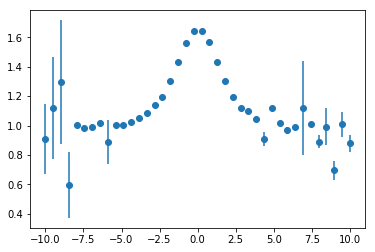

In [37]:
plt.clf()
plt.errorbar(x, y, yerr=e, fmt='o')
plt.show()

In [ ]:
qs.OPT_Rand1D(flambda,(np.array([0.0]),np.array([[1.0]])),1000, True)

/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010773]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00019237]), 'nit': 4, 'funcalls': 59}
  " state: %s" % convergence_dict)


8.235294117647058
8.235294117647058
9.411764705882355
9.411764705882355
7.647058823529413
7.647058823529413
8.823529411764707
8.823529411764707
8.235294117647058
7.647058823529413
-8.235294117647058
-8.235294117647058
9.411764705882355
-2.352941176470588
-2.352941176470588


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0009075]), 'nit': 7, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00535509]), 'nit': 6, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00084871]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnfl

-4.117647058823529
-4.117647058823529
-7.647058823529411
-7.647058823529411
4.117647058823529
4.117647058823529
5.294117647058824
5.294117647058824
5.294117647058824
-10.0
-10.0
-7.0588235294117645
-7.0588235294117645
-7.0588235294117645
-4.117647058823529
8.235294117647058
-8.823529411764707
-8.823529411764707
-8.823529411764707
4.117647058823529
-1.1764705882352935
-1.1764705882352935


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([7.7263394e-05]), 'nit': 8, 'funcalls': 99}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.7803166e-05]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00022209]), 'nit': 5, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

3.5294117647058822
3.5294117647058822
6.4705882352941195
6.4705882352941195
6.4705882352941195
6.4705882352941195


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00170837]), 'nit': 3, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-14.31389225]), 'nit': 2, 'funcalls': 43}
  " state: %s" % convergence_dict)


7.647058823529413
10.0
10.0
9.411764705882355


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012295]), 'nit': 6, 'funcalls': 61}
  " state: %s" % convergence_dict)


-5.294117647058823
-5.294117647058823
-5.294117647058823


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01630898]), 'nit': 6, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.000304]), 'nit': 9, 'funcalls': 73}
  " state: %s" % convergence_dict)


-7.647058823529411
4.117647058823529


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-5.44600189e-05]), 'nit': 6, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0001718]), 'nit': 7, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00031765]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

-8.823529411764707


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0001815]), 'nit': 4, 'funcalls': 73}
  " state: %s" % convergence_dict)


-8.823529411764707
4.117647058823529


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00076359]), 'nit': 5, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00352784]), 'nit': 6, 'funcalls': 78}
  " state: %s" % convergence_dict)


8.823529411764707


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([5.17520748e-05]), 'nit': 5, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-6.15420394e-05]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-5.99499495]), 'nit': 2, 'funcalls': 48}
  " state: %s" % convergence_dict)


2.9411764705882355
2.9411764705882355
0.0
0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01042706]), 'nit': 7, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015809]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)


-7.0588235294117645
9.411764705882355


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([3.77468026e-05]), 'nit': 8, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012638]), 'nit': 4, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010706]), 'nit': 7, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

-6.470588235294118
-6.470588235294118
-6.470588235294118
-6.470588235294118


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00516152]), 'nit': 7, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([8.19902889e-05]), 'nit': 9, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-13.26452107]), 'nit': 3, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

-7.647058823529411
-8.235294117647058
0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.04701646e-05]), 'nit': 5, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010829]), 'nit': 7, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.23017817e-05]), 'nit': 8, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  stat

-7.647058823529411


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00019632]), 'nit': 7, 'funcalls': 61}
  " state: %s" % convergence_dict)


7.647058823529413
-5.294117647058823


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00363263]), 'nit': 9, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00753168]), 'nit': 5, 'funcalls': 82}
  " state: %s" % convergence_dict)


10.0
1.764705882352942
1.764705882352942


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00016011]), 'nit': 3, 'funcalls': 52}
  " state: %s" % convergence_dict)


5.294117647058824


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([3.79176369e-05]), 'nit': 5, 'funcalls': 75}
  " state: %s" % convergence_dict)


6.4705882352941195


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00017185]), 'nit': 8, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012777]), 'nit': 5, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0021553]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)


-1.1764705882352935


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01280724]), 'nit': 11, 'funcalls': 95}
  " state: %s" % convergence_dict)


0.5882352941176467


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00035239]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)


0.5882352941176467
-8.823529411764707


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00025196]), 'nit': 7, 'funcalls': 89}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-3.64946618e-05]), 'nit': 7, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([4.81878587e-05]), 'nit': 9, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state

-0.5882352941176467
-0.5882352941176467
0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00252042]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01170057]), 'nit': 9, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00530279]), 'nit': 5, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.5882352941176467


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0185804]), 'nit': 5, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00034168]), 'nit': 9, 'funcalls': 98}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0084404]), 'nit': 6, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00103013]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02355165]), 'nit': 7, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00133812]), 'nit': 7, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00167494]), 'nit': 7, 'funcalls': 99}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08582282]), 'nit': 6, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

-8.235294117647058
0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00024915]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00416303]), 'nit': 8, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00606966]), 'nit': 7, 'funcalls': 91}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00144671]), 'nit': 7, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00106003]), 'nit': 7, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00321688]), 'nit': 8, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.12805831]), 'nit': 6, 'funcalls': 98}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02151563]), 'nit': 7, 'funcalls': 92}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00025299]), 'nit': 6, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.23495793]), 'nit': 8, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00040174]), 'nit': 11, 'funcalls': 128}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00021386]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.1457643e-05]), 'nit': 7, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01344967]), 'nit': 5, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00034142]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00108433]), 'nit': 8, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00034046]), 'nit': 7, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.09378719]), 'nit': 5, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.25900655]), 'nit': 7, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-53.04084518]), 'nit': 3, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.09404309]), 'nit': 6, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00062084]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.23424959]), 'nit': 10, 'funcalls': 114}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.10052233]), 'nit': 6, 'funcalls': 115}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.10052952]), 'nit': 8, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([3.61651182e-05]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.03706169]), 'nit': 10, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01261282]), 'nit': 9, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([5.55515289e-05]), 'nit': 7, 'funcalls': 89}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01669955]), 'nit': 8, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03907466]), 'nit': 7, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01067376]), 'nit': 8, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.1942215]), 'nit': 6, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08504868]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.62124634e-05]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01630331]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02049793]), 'nit': 8, 'funcalls': 110}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.07699181]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.24791336]), 'nit': 6, 'funcalls': 89}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.63611269]), 'nit': 6, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00413322]), 'nit': 9, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([1.257658e-05]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00038758]), 'nit': 9, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00259614]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00105667]), 'nit': 9, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.07657123]), 'nit': 8, 'funcalls': 100}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0838837]), 'nit': 7, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00129619]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00110248]), 'nit': 9, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00062513]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00142765]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00075436]), 'nit': 5, 'funcalls': 72}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00566375]), 'nit': 9, 'funcalls': 134}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01493227]), 'nit': 8, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00054073]), 'nit': 8, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.4458133]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.255265]), 'nit': 3, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.13493741]), 'nit': 8, 'funcalls': 109}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnfl

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.5416196]), 'nit': 7, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03823054]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00065452]), 'nit': 9, 'funcalls': 103}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00701213]), 'nit': 8, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03806186]), 'nit': 6, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00182223]), 'nit': 8, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00104656]), 'nit': 8, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00055559]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00981936]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.07053196]), 'nit': 8, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.14146495]), 'nit': 7, 'funcalls': 106}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.46512556]), 'nit': 6, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.05494107]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01114425]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01077527]), 'nit': 8, 'funcalls': 93}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00775611]), 'nit': 7, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.57775635]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00752395]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.16042316]), 'nit': 8, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.12177271]), 'nit': 9, 'funcalls': 98}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00455487]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00074291]), 'nit': 8, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00078535]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.27246344]), 'nit': 8, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01187158]), 'nit': 5, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.22209811]), 'nit': 6, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.23062515]), 'nit': 8, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00066853]), 'nit': 7, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.14617062]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.07057607]), 'nit': 8, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0022223]), 'nit': 8, 'funcalls': 111}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.06630468]), 'nit': 8, 'funcalls': 89}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012219]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.16077572]), 'nit': 7, 'funcalls': 111}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00062209]), 'nit': 7, 'funcalls': 91}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.21455455]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.06391025]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.60932243]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00110388]), 'nit': 11, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01944971]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.15610886]), 'nit': 5, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00185061]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.18617415]), 'nit': 7, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00093293]), 'nit': 10, 'funcalls': 98}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00178945]), 'nit': 6, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00258136]), 'nit': 7, 'funcalls': 91}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-185.71032542]), 'nit': 3, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.20891762e-05]), 'nit': 5, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00200881]), 'nit': 9, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.09781673]), 'nit': 5, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([3.07559967e-05]), 'nit': 10, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0236423]), 'nit': 4, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-179.79256439]), 'nit': 2, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([1.10088523]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00063045]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.12165689]), 'nit': 8, 'funcalls': 89}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.04941928]), 'nit': 4, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00041914]), 'nit': 6, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.70186996]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.12770844]), 'nit': 8, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.66927969]), 'nit': 6, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.23361468]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00591791]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00749695]), 'nit': 9, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.38311183]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.08143669]), 'nit': 5, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00921983]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00772625]), 'nit': 8, 'funcalls': 91}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00112782]), 'nit': 6, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00352281]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-853.65483087]), 'nit': 2, 'funcalls': 29}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00538902]), 'nit': 8, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00208191]), 'nit': 6, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00161848]), 'nit': 10, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00080729]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.18232822]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01412678]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0008623]), 'nit': 12, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00058478]), 'nit': 8, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.20818588]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00272617]), 'nit': 8, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.61185142]), 'nit': 8, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.80073768]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.11931562]), 'nit': 7, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-292.53779745]), 'nit': 4, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00020885]), 'nit': 7, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.63375545]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.10530043]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00051939]), 'nit': 10, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.31078887]), 'nit': 5, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.2122457]), 'nit': 9, 'funcalls': 119}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00276828]), 'nit': 9, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-217.09369111]), 'nit': 2, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00277185]), 'nit': 11, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02767533]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04887897]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08457971]), 'nit': 4, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0874173]), 'nit': 6, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.04418433]), 'nit': 7, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.57557166]), 'nit': 8, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00515378]), 'nit': 7, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00620079]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00152403]), 'nit': 5, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00910622]), 'nit': 8, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.10000128]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.1777401]), 'nit': 4, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00351506]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02018264]), 'nit': 7, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-794.65013882]), 'nit': 2, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.14451668]), 'nit': 9, 'funcalls': 75}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.12435268]), 'nit': 8, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.21156748]), 'nit': 6, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.32987678]), 'nit': 9, 'funcalls': 63}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.1267097]), 'nit': 7, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-847.56234373]), 'nit': 1, 'funcalls': 30}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.23526645]), 'nit': 6, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.18548322]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.21789408]), 'nit': 8, 'funcalls': 103}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.50579941]), 'nit': 6, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02590929]), 'nit': 5, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01708317]), 'nit': 7, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.21280062]), 'nit': 6, 'funcalls': 69}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00172877]), 'nit': 7, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.65731239]), 'nit': 5, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01347971]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00108755]), 'nit': 9, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([1.74045563e-05]), 'nit': 6, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00270841]), 'nit': 8, 'funcalls': 77}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.07966524]), 'nit': 6, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00190502]), 'nit': 8, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-415.02931571]), 'nit': 2, 'funcalls': 60}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00238385]), 'nit': 5, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04173476]), 'nit': 10, 'funcalls': 76}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00353861]), 'nit': 9, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.49320853]), 'nit': 6, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00457573]), 'nit': 8, 'funcalls': 71}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.07480028]), 'nit': 6, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.30766472]), 'nit': 8, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0018144]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnfl

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.16377163]), 'nit': 7, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00014353]), 'nit': 12, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-688.2127139]), 'nit': 3, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01240636]), 'nit': 8, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00316532]), 'nit': 8, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.13879833]), 'nit': 10, 'funcalls': 64}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00305748]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00099003]), 'nit': 9, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01593757]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00127713]), 'nit': 9, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08878495]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00161158]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012398]), 'nit': 9, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.48056364]), 'nit': 8, 'funcalls': 109}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00038147]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0109266]), 'nit': 6, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0086118]), 'nit': 7, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.09049797]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01732427]), 'nit': 5, 'funcalls': 66}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00496167]), 'nit': 8, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01596324]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.15533906]), 'nit': 7, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00065586]), 'nit': 8, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.09129508]), 'nit': 6, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00334184]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00188006]), 'nit': 4, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02975204]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([9.12547112e-05]), 'nit': 8, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.06668168]), 'nit': 8, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.76219869]), 'nit': 7, 'funcalls': 72}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.22972775]), 'nit': 7, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.10425377]), 'nit': 7, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.23343277]), 'nit': 6, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00468087]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-102.52733725]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-497.42586908]), 'nit': 3, 'funcalls': 40}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.09367216]), 'nit': 6, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00105238]), 'nit': 6, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00978565]), 'nit': 7, 'funcalls': 89}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08745199]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00171983]), 'nit': 8, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.6914255]), 'nit': 8, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00156486]), 'nit': 7, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00117707]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-707.70699874]), 'nit': 2, 'funcalls': 62}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-743.44311303]), 'nit': 1, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0157609]), 'nit': 7, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04807162]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.18772101]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-864.03943697]), 'nit': 2, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.1194613]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00650291]), 'nit': 4, 'funcalls': 47}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-632.1464144]), 'nit': 2, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01261893]), 'nit': 8, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-896.96840861]), 'nit': 3, 'funcalls': 42}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.34325987]), 'nit': 8, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00176144]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-897.12386051]), 'nit': 2, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.16632557]), 'nit': 9, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02872193]), 'nit': 10, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.44621227]), 'nit': 8, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-897.52895343]), 'nit': 2, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-738.49872841]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.21404147]), 'nit': 6, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-11.91940242]), 'nit': 3, 'funcalls': 41}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05038776]), 'nit': 7, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-101.72527204]), 'nit': 3, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-904.04771549]), 'nit': 1, 'funcalls': 34}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00069331]), 'nit': 9, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02159047]), 'nit': 8, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-626.62944521]), 'nit': 3, 'funcalls': 44}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02995986]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.58877696]), 'nit': 9, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00023878]), 'nit': 7, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00093904]), 'nit': 5, 'funcalls': 64}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-761.05211349]), 'nit': 2, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-4.82201576e-05]), 'nit': 8, 'funcalls': 72}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-762.50921017]), 'nit': 2, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.18543367]), 'nit': 6, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0175326]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.44739904]), 'nit': 5, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-897.52218101]), 'nit': 3, 'funcalls': 47}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1008.74399941]), 'nit': 3, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-981.4120828]), 'nit': 2, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1212.83281531]), 'nit': 2, 'funcalls': 31}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00064301]), 'nit': 9, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.11860704]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01335168]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-101.88765416]), 'nit': 3, 'funcalls': 39}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00853738]), 'nit': 6, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-902.81732889]), 'nit': 2, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1135.58219774]), 'nit': 2, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08522177]), 'nit': 7, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0334034]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00363181]), 'nit': 10, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00211586]), 'nit': 6, 'funcalls': 70}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1144.94779068]), 'nit': 2, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.82165843]), 'nit': 7, 'funcalls': 101}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-77.33668959]), 'nit': 4, 'funcalls': 58}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1563.99267435]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.08991814]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.19727468]), 'nit': 10, 'funcalls': 79}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-45.09917372]), 'nit': 3, 'funcalls': 42}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.45666915]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00528187]), 'nit': 6, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-642.52099511]), 'nit': 4, 'funcalls': 43}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1284.49816602]), 'nit': 1, 'funcalls': 46}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([1.11235845]), 'nit': 5, 'funcalls': 69}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00106168]), 'nit': 8, 'funcalls': 74}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-657.54097147]), 'nit': 3, 'funcalls': 35}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.27749842]), 'nit': 4, 'funcalls': 60}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1056.99514022]), 'nit': 2, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1000.4097216]), 'nit': 3, 'funcalls': 43}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00110289]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05917859]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.23687148]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00201726]), 'nit': 8, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.10027122e-05]), 'nit': 8, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.22984697]), 'nit': 9, 'funcalls': 122}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-945.3073999]), 'nit': 2, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.1737768]), 'nit': 9, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.64168984]), 'nit': 6, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0356985]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05111766]), 'nit': 6, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.99656224]), 'nit': 6, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0025835]), 'nit': 9, 'funcalls': 100}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0087204]), 'nit': 6, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01823854]), 'nit': 8, 'funcalls': 58}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.81092453e-05]), 'nit': 6, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.15750706]), 'nit': 7, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.16687506]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-909.56202747]), 'nit': 3, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.12670851]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1056.17907978]), 'nit': 2, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-870.27853747]), 'nit': 3, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1811.61240987]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01405048]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00114202]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1068.97634268]), 'nit': 4, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01757693]), 'nit': 7, 'funcalls': 54}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.29139954]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-885.02322882]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00151536]), 'nit': 7, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.1761816]), 'nit': 8, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([1.51476455]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-833.9193702]), 'nit': 3, 'funcalls': 42}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-882.15329576]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.04556257]), 'nit': 10, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-388.10263288]), 'nit': 3, 'funcalls': 37}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.54017496]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.9093554]), 'nit': 6, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-269.41458321]), 'nit': 3, 'funcalls': 43}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1182.8893459]), 'nit': 3, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02801037]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.10127449]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.13040602]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00258741]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02958211]), 'nit': 9, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.04062709]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-705.01527764]), 'nit': 3, 'funcalls': 38}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01958971]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1235.9404557]), 'nit': 3, 'funcalls': 42}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01886797]), 'nit': 9, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.10008156]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00094736]), 'nit': 9, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.19374257]), 'nit': 6, 'funcalls': 55}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1062.08947824]), 'nit': 2, 'funcalls': 48}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02272278]), 'nit': 8, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04138708]), 'nit': 8, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-691.12815189]), 'nit': 4, 'funcalls': 47}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01807227]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.17532202]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01102764]), 'nit': 8, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1086.01285662]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1073.47356947]), 'nit': 3, 'funcalls': 36}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state:

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00059271]), 'nit': 8, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0006609]), 'nit': 10, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.61323309]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0007827]), 'nit': 9, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.16490018]), 'nit': 8, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.15365665]), 'nit': 6, 'funcalls': 91}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05813658]), 'nit': 6, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.29745512]), 'nit': 9, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03968289]), 'nit': 7, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0193128]), 'nit': 7, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.15248361]), 'nit': 11, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0419735]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00101704]), 'nit': 8, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00385521]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.24642032]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03014305]), 'nit': 8, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.27786601]), 'nit': 5, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01327857]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00116782]), 'nit': 10, 'funcalls': 60}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0011338]), 'nit': 8, 'funcalls': 61}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00706625]), 'nit': 9, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05043745]), 'nit': 10, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.12715149]), 'nit': 9, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00164872]), 'nit': 8, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.56383722]), 'nit': 8, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.19737466]), 'nit': 7, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03674173]), 'nit': 8, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02228951]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.06150901]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1833.60908855]), 'nit': 2, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02591386]), 'nit': 10, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00275484]), 'nit': 7, 'funcalls': 58}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.03167067]), 'nit': 7, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02861507]), 'nit': 8, 'funcalls': 92}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02306217]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0095619]), 'nit': 7, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.05077612]), 'nit': 7, 'funcalls': 67}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.90661144]), 'nit': 9, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00194311]), 'nit': 11, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01235533]), 'nit': 8, 'funcalls': 80}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00214466]), 'nit': 9, 'funcalls': 85}
  " state: %s" % convergence_dict)


0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00199579]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03252297]), 'nit': 7, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02601017]), 'nit': 8, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

0.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01599845]), 'nit': 8, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00626302]), 'nit': 8, 'funcalls': 67}
  " state: %s" % convergence_dict)
